## Семинар 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_bmds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат -2 балла.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**



-----

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 – 10 баллов
* Задача 2 – 10 баллов
* Задача 3 – 10 баллов

In [134]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Пусть нам попались какие-то данные.

В данном случае - 100 различных значений какой-то величины.

In [135]:
size = 100
sample = sps.norm.rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

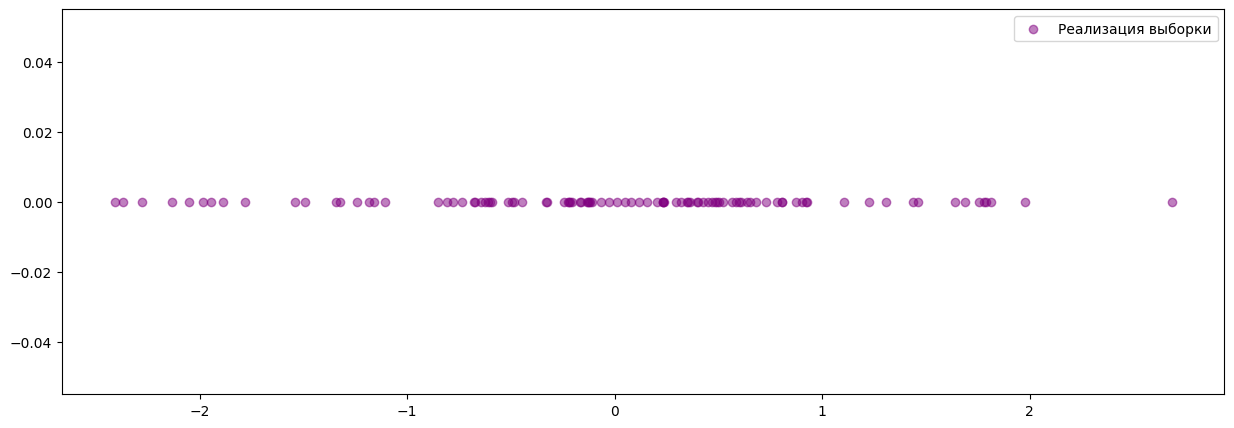

In [136]:
# рисуем график
# по оси x - значения реализаций случайной величины

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()
plt.show()

Для начала давайте попробуем прикинуть, как распределены данные:

## Гистограмма

Идея: разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

Формально: $X_1, \ldots X_n$ - выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ - разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ - количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки matplotlib.

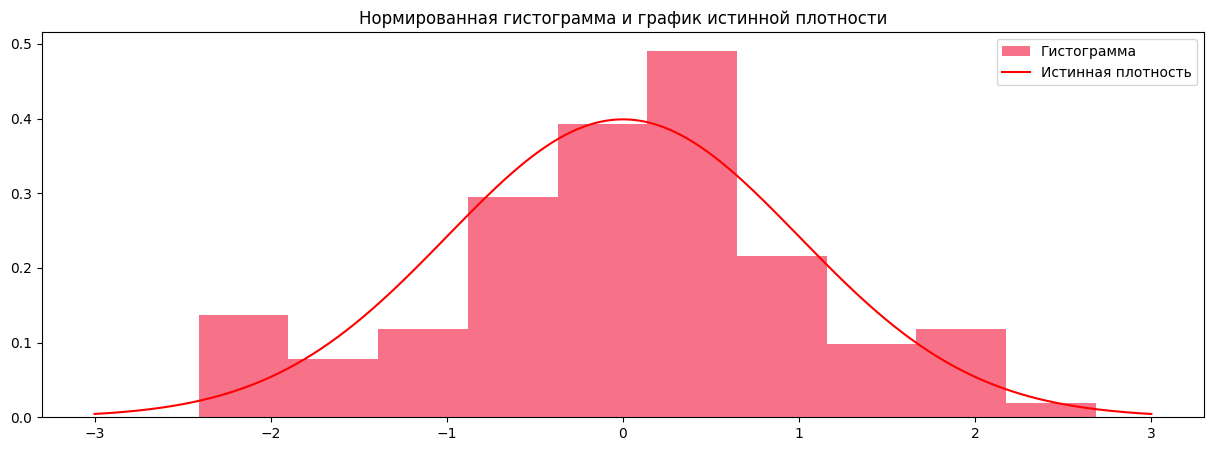

In [137]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма")
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1

grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Другой способ:

Для построения гистограммы удобно использовать библиотеку seaborn (подробнее - в туториалах).

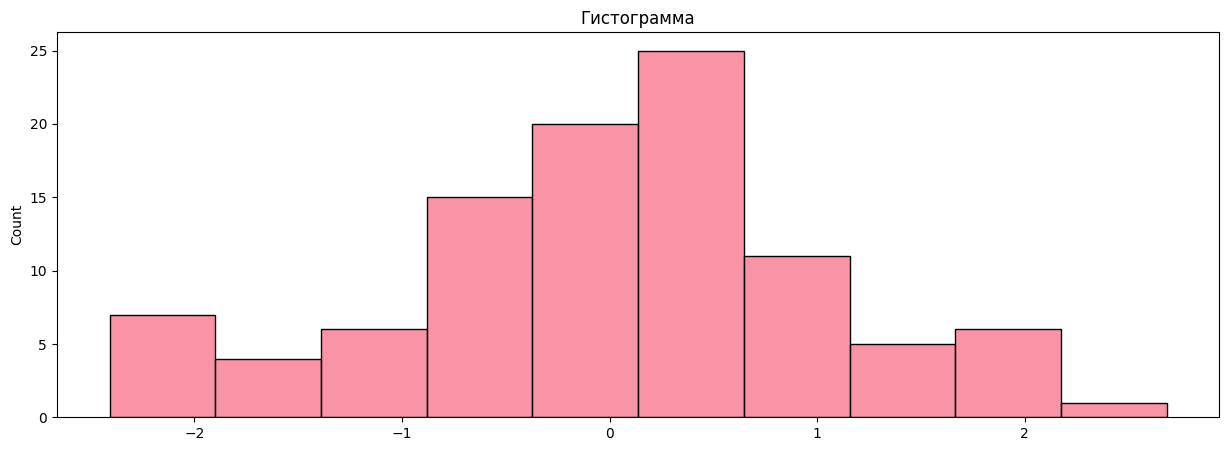

In [138]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Посмотрим, на что влияет количество корзин.

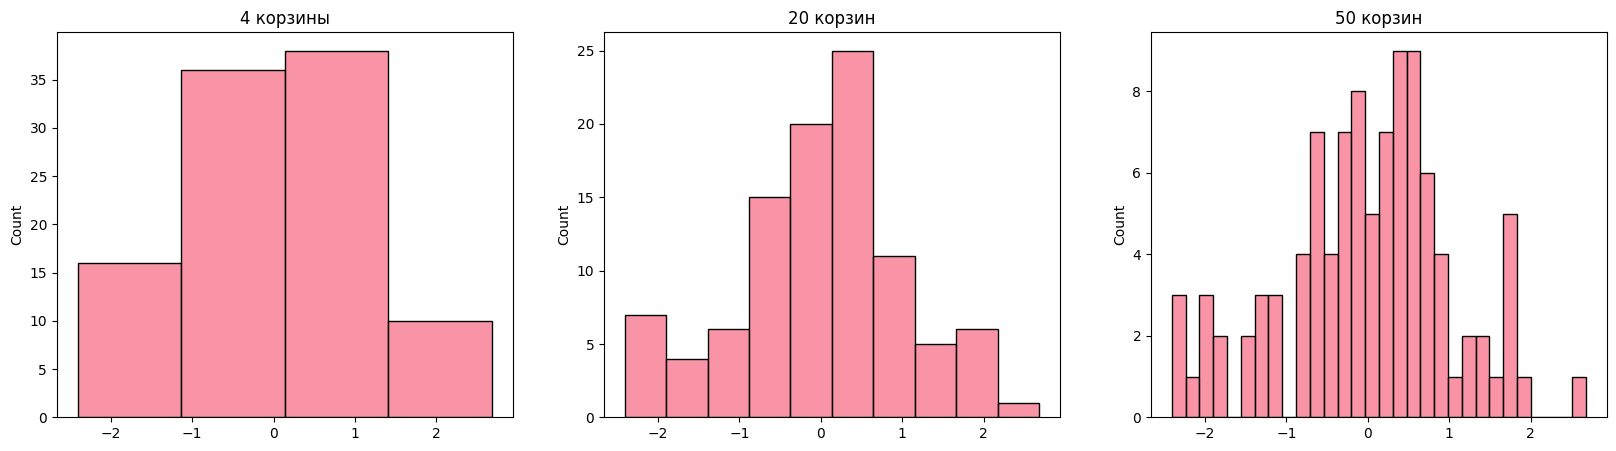

In [139]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )


sns.histplot(data=sample, bins = 4, ax=axs[0])
sns.histplot(data=sample, bins = 10, ax=axs[1])
sns.histplot(data=sample, bins = 30, ax=axs[2])


#data - наши данные, bins - количество корзин

plt.show()

### Задача 1
Рассмотрим функцию `np.random.randint()`.

Выберите любые значения a и b и создайте массив рандомных чисел от a до b (размер массива 100).

In [140]:
import numpy as np

a = 25
b = 125
n = 100

array = np.random.randint(a, b, size=n)

Постройте гистограмму для этого массива.

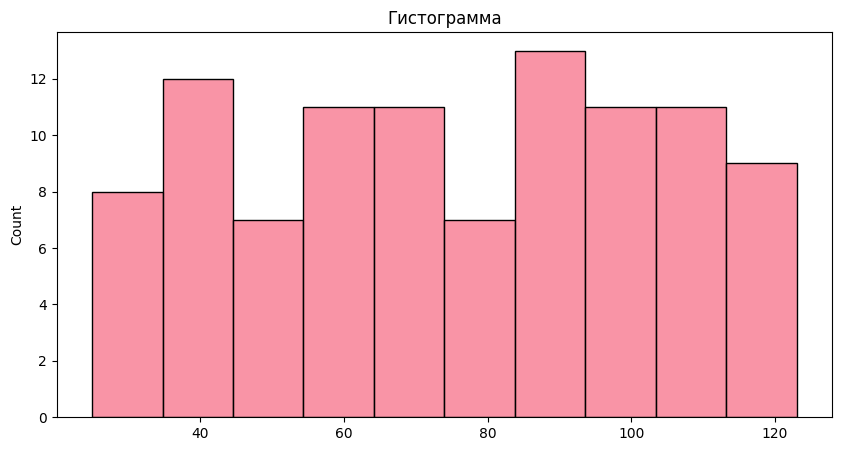

In [141]:
plt.figure(figsize=(10, 5))

plt.title("Гистограмма")

sns.histplot(data=array, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Постройте более четкий график, увеличив параметр `bins`.

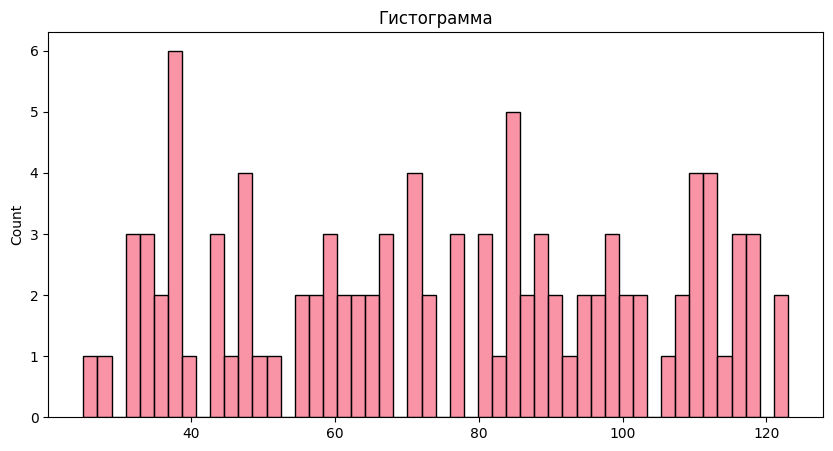

In [142]:
n = 50

plt.figure(figsize=(10, 5))

plt.title("Гистограмма")

sns.histplot(data=array, bins = n)
#data - наши данные, bins - количество корзин

plt.show()

Создайте массив sizes, который будет состоять из 1e3, 1e4, 1e5 (используйте `np.logspace()`). Числа должны быть целыми.

In [143]:
sizes = np.logspace(2, 5, 4, base=10.0, dtype=int)
print(sizes)

[   100   1000  10000 100000]


Постройте plt.subplots в виде строки из 4 графиков. Параметр `bins` укажите 100. На каждом графике отрисуйте гистограмму массива заданного размера из массива sizes. Подпишите, какой размер массивы к какому графику относится.

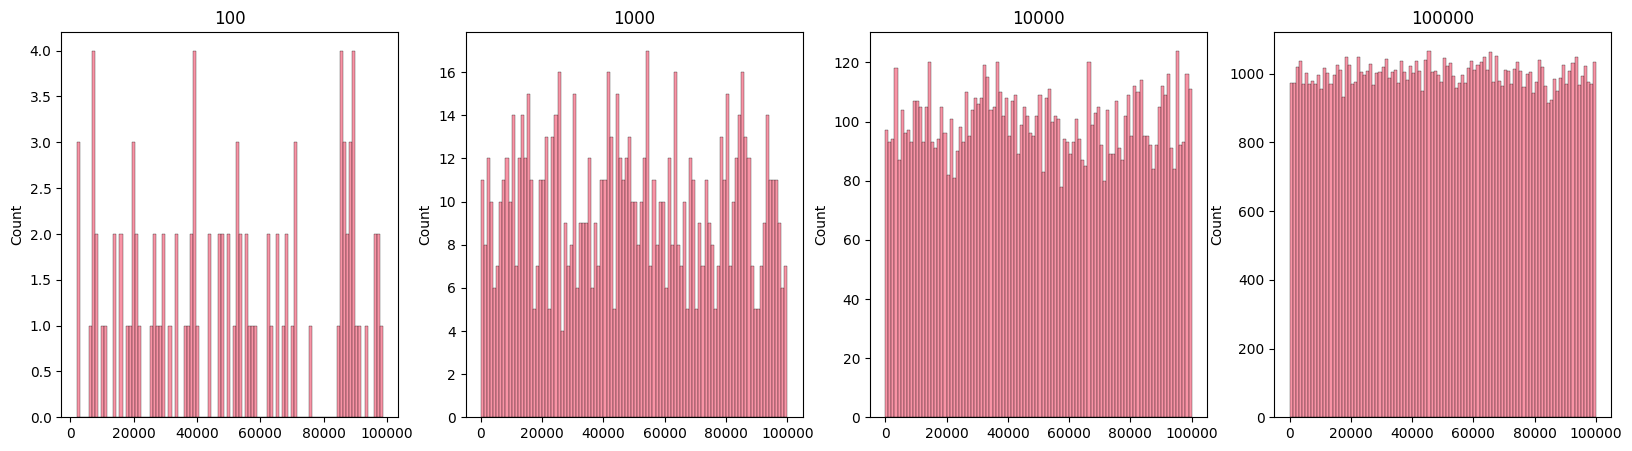

In [144]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=4)

axs[0].set_title("100")
axs[1].set_title("1000")
axs[2].set_title("10000")
axs[3].set_title("100000")

sns.histplot(data=np.random.randint(1, 10**5, size=sizes[0]), bins = 100, ax=axs[0])
sns.histplot(data=np.random.randint(1, 10**5, size=sizes[1]), bins = 100, ax=axs[1])
sns.histplot(data=np.random.randint(1, 10**5, size=sizes[2]), bins = 100, ax=axs[2])
sns.histplot(data=np.random.randint(1, 10**5, size=sizes[3]), bins = 100, ax=axs[3])

plt.show()

На какое распределение похоже?

Это похоже на **равномерное** распределение, т.к. с увеличением размера массива гистограмма равномерно заполняется и высота столбцов постепенно уравнивается, также отсутсвуют резкие пики.

### Задача 2
Напишите собственную реализацию нормального распределения. Создайте класс и определите в нем функцию _pdf. Напомним, что плотность нормального распределения расчитывается следующим образом:
$$ \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$
Для построения функции возьмите $\mu$ = 0, $\sigma$ = 1


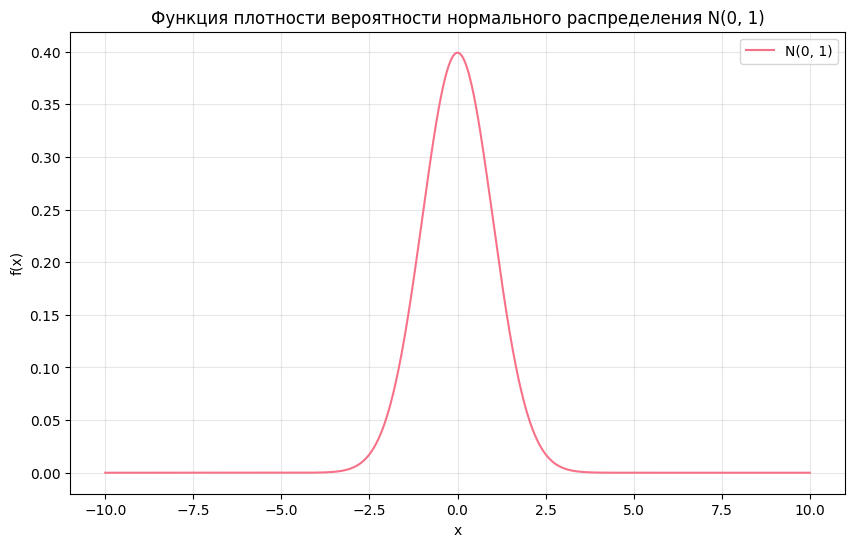

Моё время работы: 0.000000 секунд


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

class NormalDistribution:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
    
    def _pdf(self, x):
        k = 1 / (self.sigma * np.sqrt(2 * np.pi))
        power = - ((x-self.mu)**2) / (2*self.sigma**2)
        return k*np.exp(power)

    def plot_pdf(self, x_min=-10, x_max=10, num_points=1000):
        x = np.linspace(x_min, x_max, num_points)
        y = self._pdf(x)
    
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label=f'N({self.mu}, {self.sigma})')
        plt.title(f'Функция плотности вероятности нормального распределения N({self.mu}, {self.sigma})')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()

normal_dist = NormalDistribution(mu=0, sigma=1)
normal_dist.plot_pdf()

start_time = time.time()
our_pdf = normal_dist._pdf(x)
our_time = time.time() - start_time
print(f'Моё время работы: {our_time:.6f} секунд')

Сгенерируйте выборку из 2000 элементов. Засеките время генерации выборки.

In [146]:
import time

start_time = time.time()

size = 2000
sample = sps.norm.rvs(size=size)

end_time = time.time()
full_time = end_time - start_time

print(sample)
print(f'Время генерации: {full_time:.6f} секунд')

[-1.279306   -1.32329504  0.171773   ... -1.22738137  0.11781556
  1.26315798]
Время генерации: 0.006673 секунд


Постройте гистограмму для вашей выборки

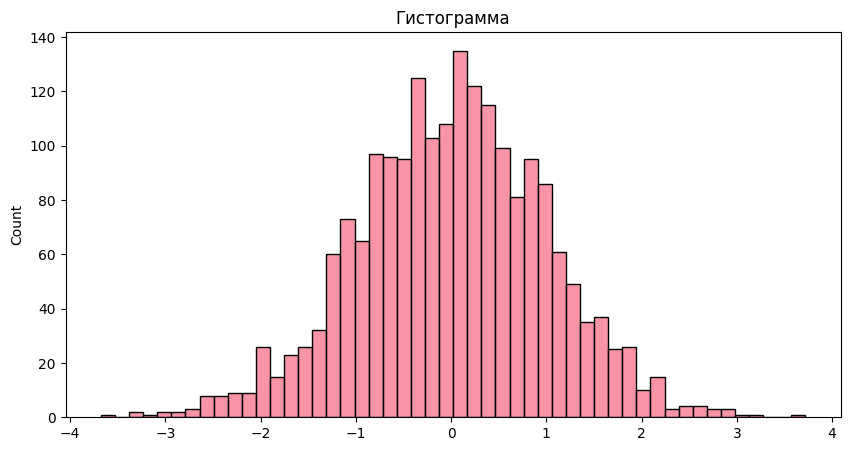

In [147]:
plt.figure(figsize=(10, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 50)

plt.show()

Сравните время работы вашей реализации и реализации из `scipy.stats`

In [148]:
start_time = time.time()
scipy_pdf = norm.pdf(x, 0, 1)
scipy_time = time.time() - start_time

print(f'Время реализации из scipy.stats: {scipy_time:.6f} секунд')

Время реализации из scipy.stats: 0.004631 секунд


Время реализации из `scipy.stats` быстрее, чем моё.

Как, используя вашу функцию, можно создавать выборки для других значений $\mu$ и $\sigma$? Проиллюстрируйте.

### Ядерная оценка плотности

KDE (kernel density estimation) - непараметричеcкий способ оценивания случайной величины.

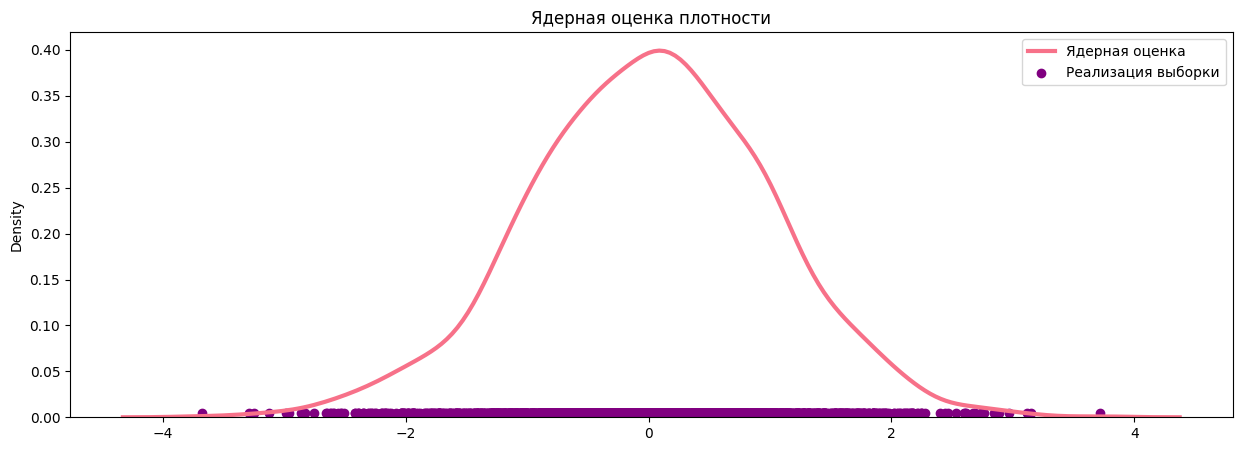

In [149]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()

Сравним график ядерной оценки с графиком истинной плотности.

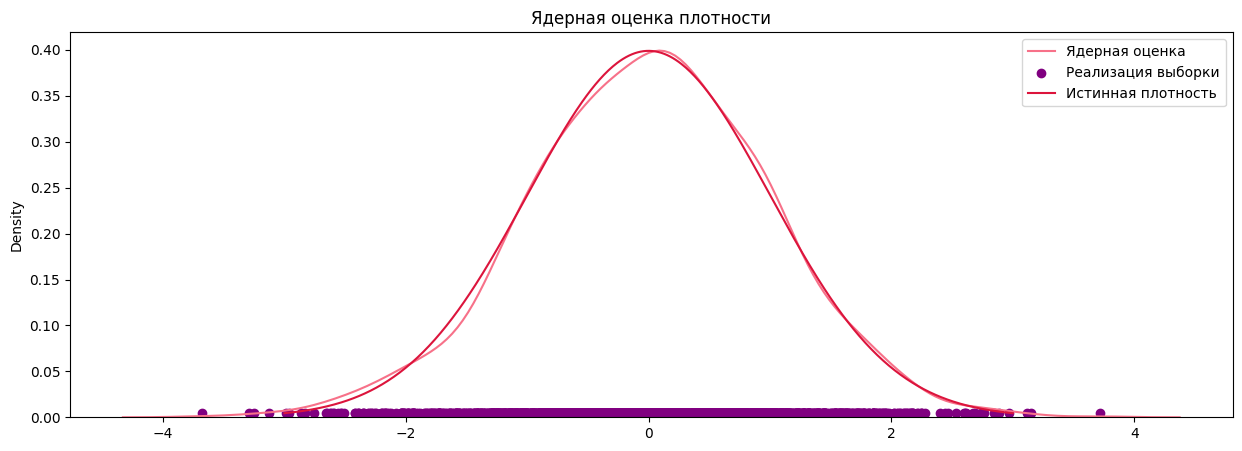

In [150]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), color='crimson', label='Истинная плотность')


plt.legend()
plt.show()

Также метод histplot позволяет сразу строить и гистограмму, и ядерную оценку плотности.

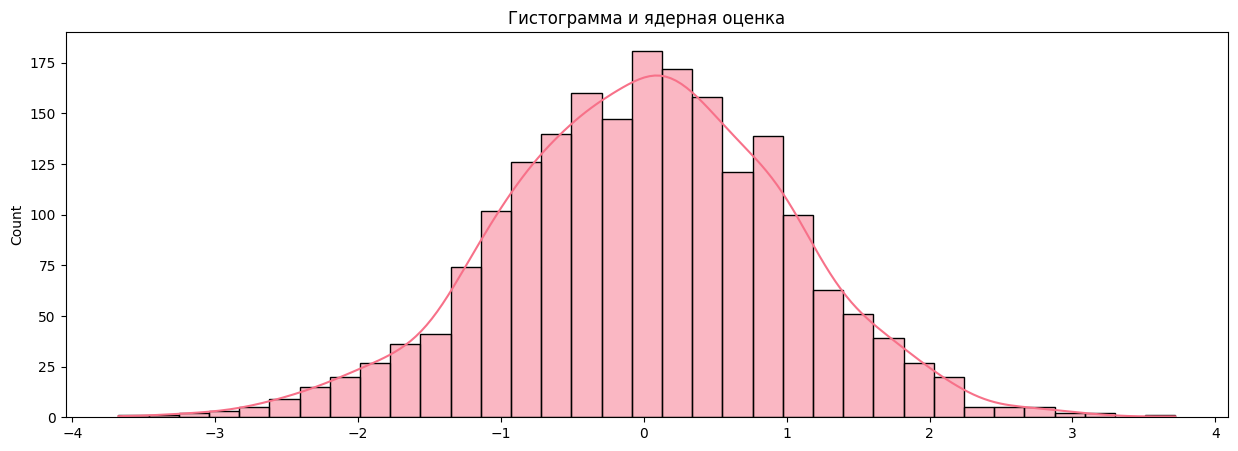

In [151]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

### Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [152]:
size = 1000
sample = sps.norm(loc=3, scale=5).rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

Посчитаем выборочное среднее

In [153]:
mean = sample.sum() / size

print("Выборочное среднее:", mean)

Выборочное среднее: 2.998108284788402


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

Посчитаем выборочное среднее по всем префиксам выборки ($j \in {1, \ldots n}$):

$(\overline{X} )_j = \sum\limits_{i=1}^j X_i$

In [154]:
means = sample.cumsum() / (np.arange(size) + 1)

Построим график зависимости среднего от размера префикса:

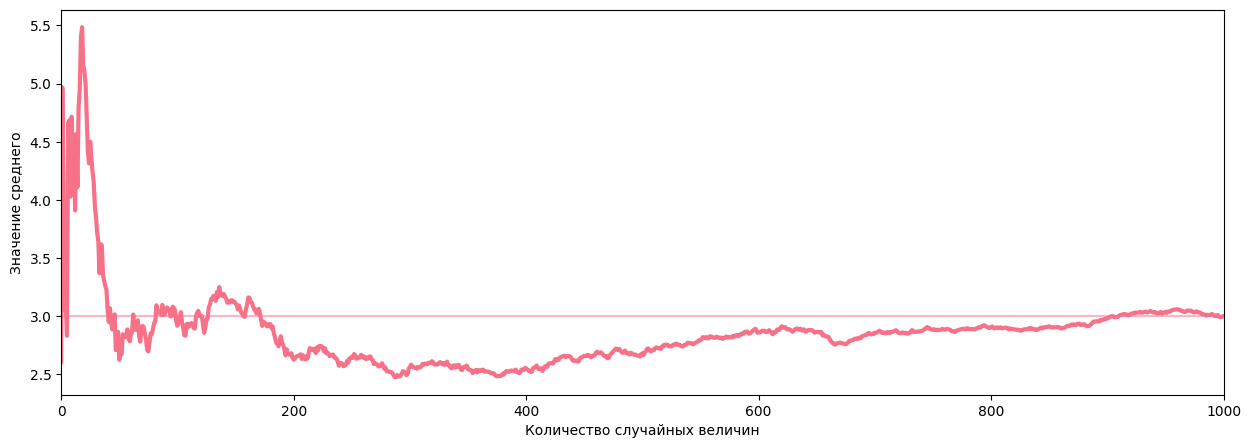

In [155]:
plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

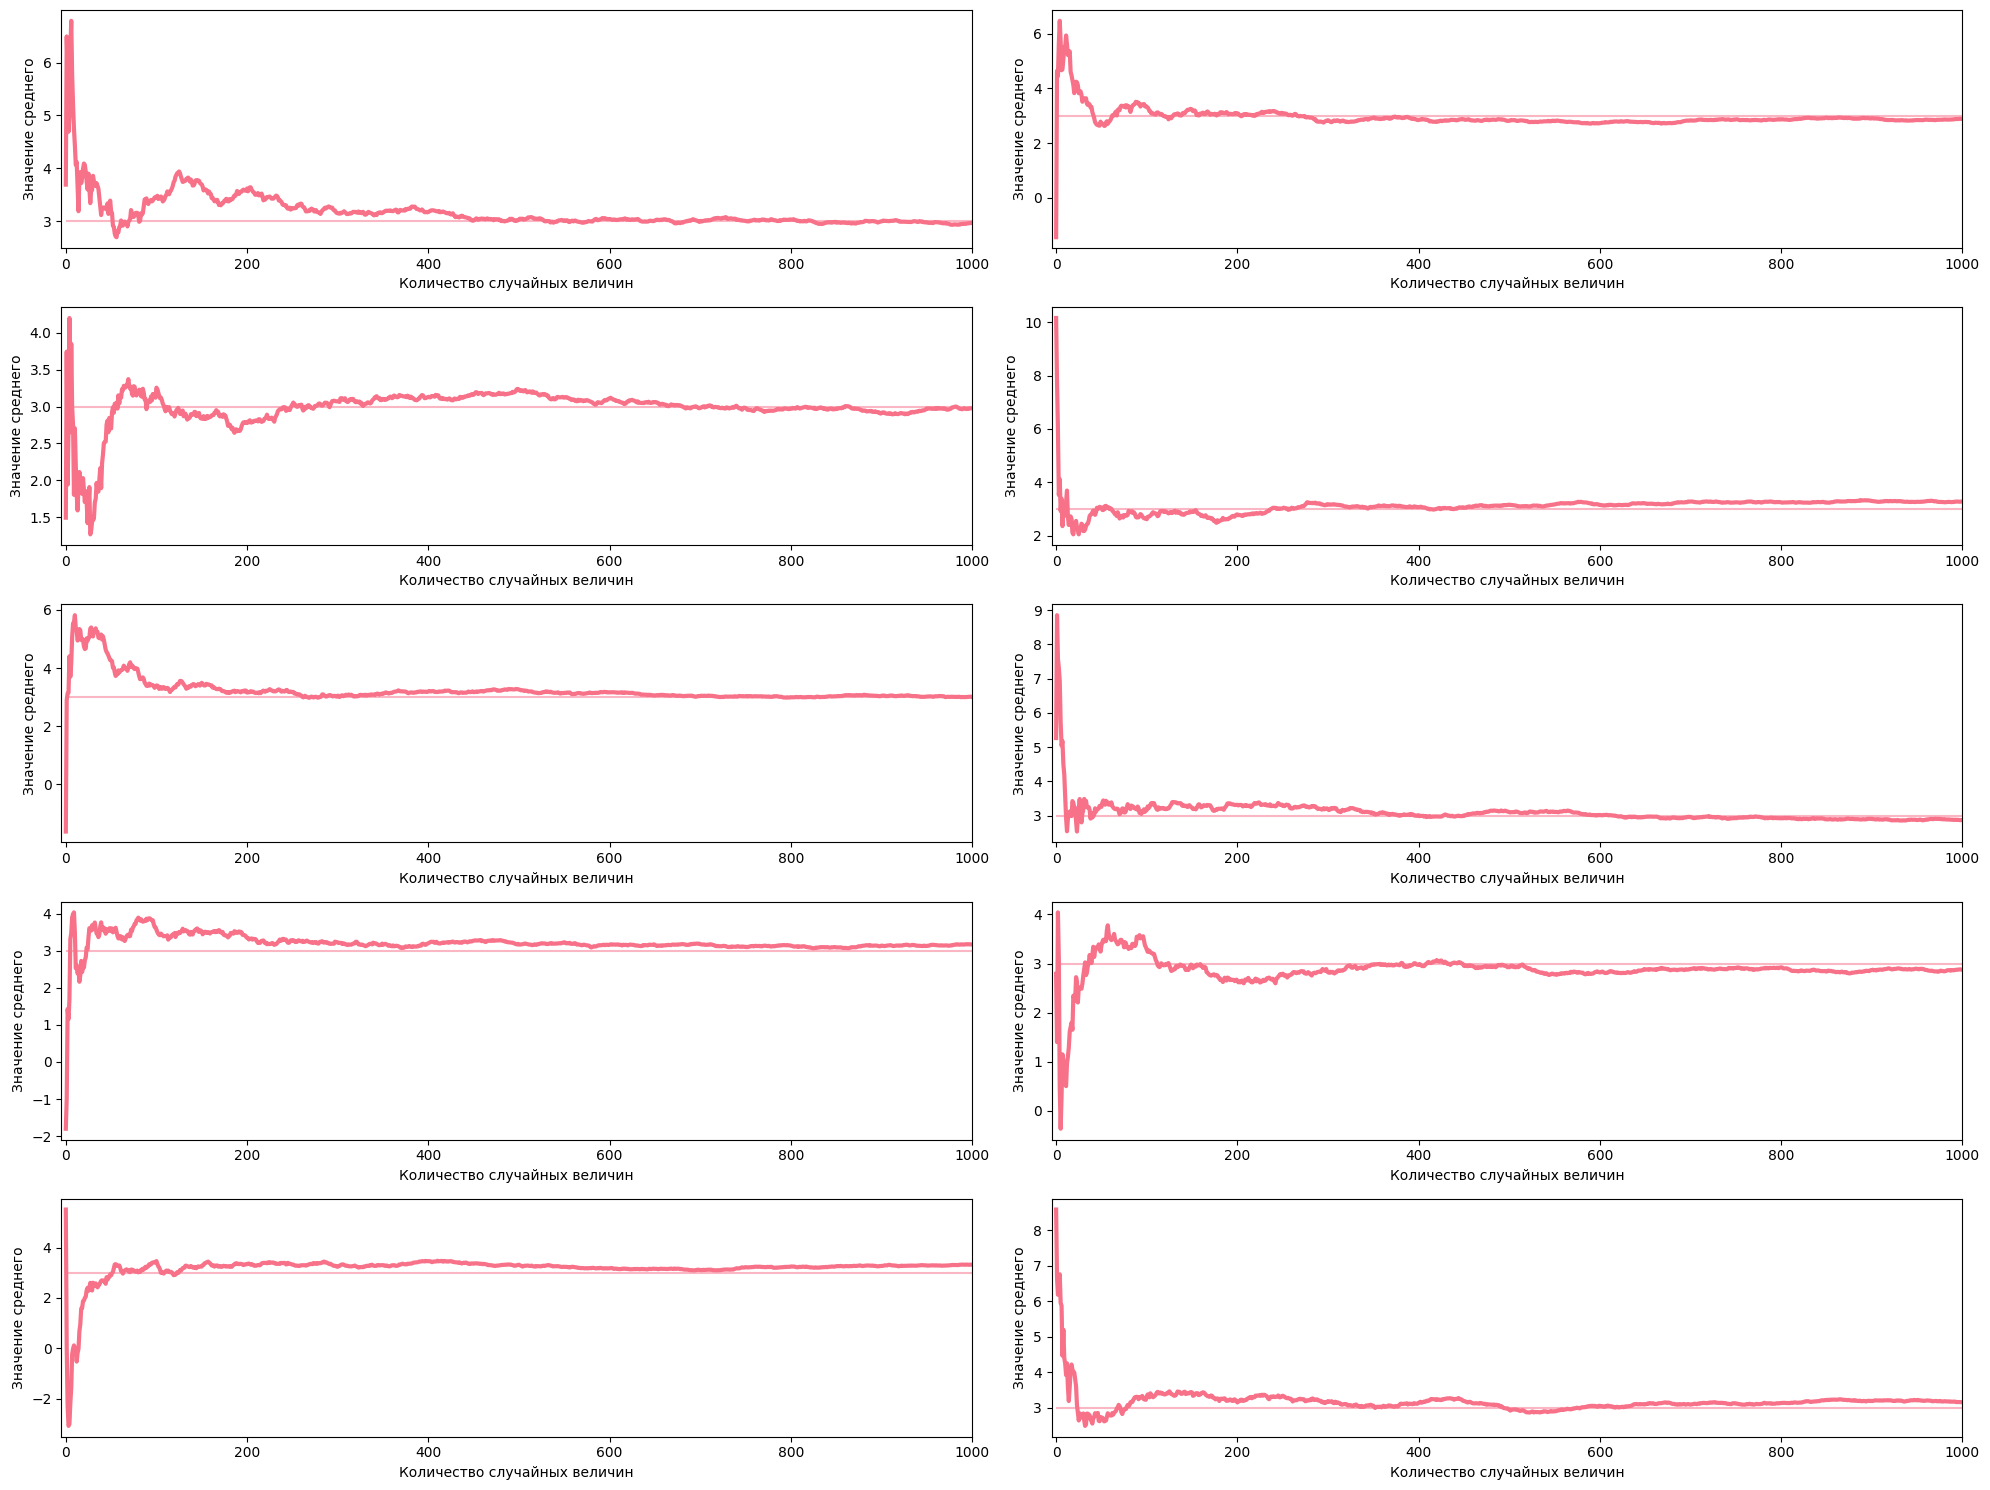

In [156]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)

    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

### Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.







In [157]:
size = 1000
samples_count = 500

sample = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

Нарисуем траектории среднего для всех реализациий на одном графике.

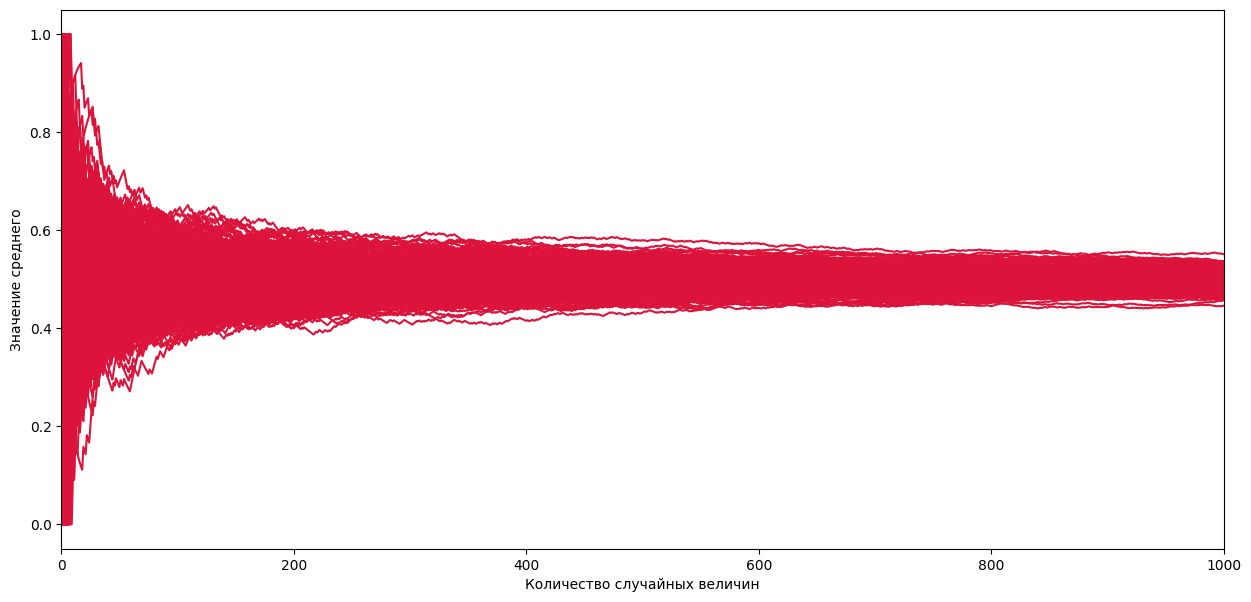

In [158]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

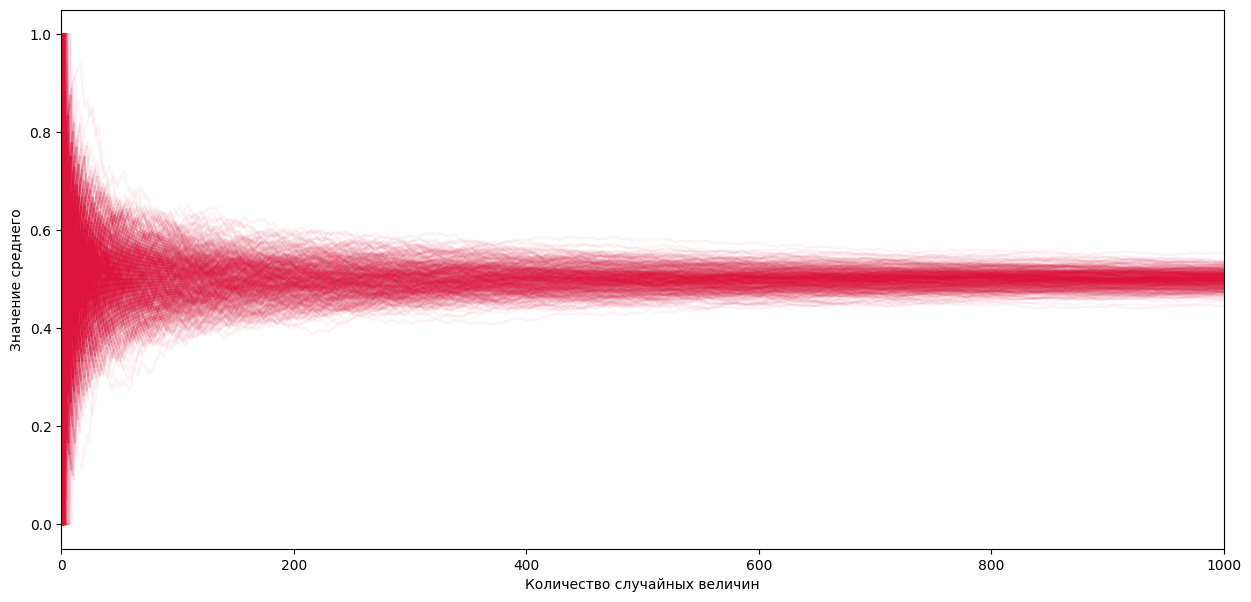

In [159]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще меньше

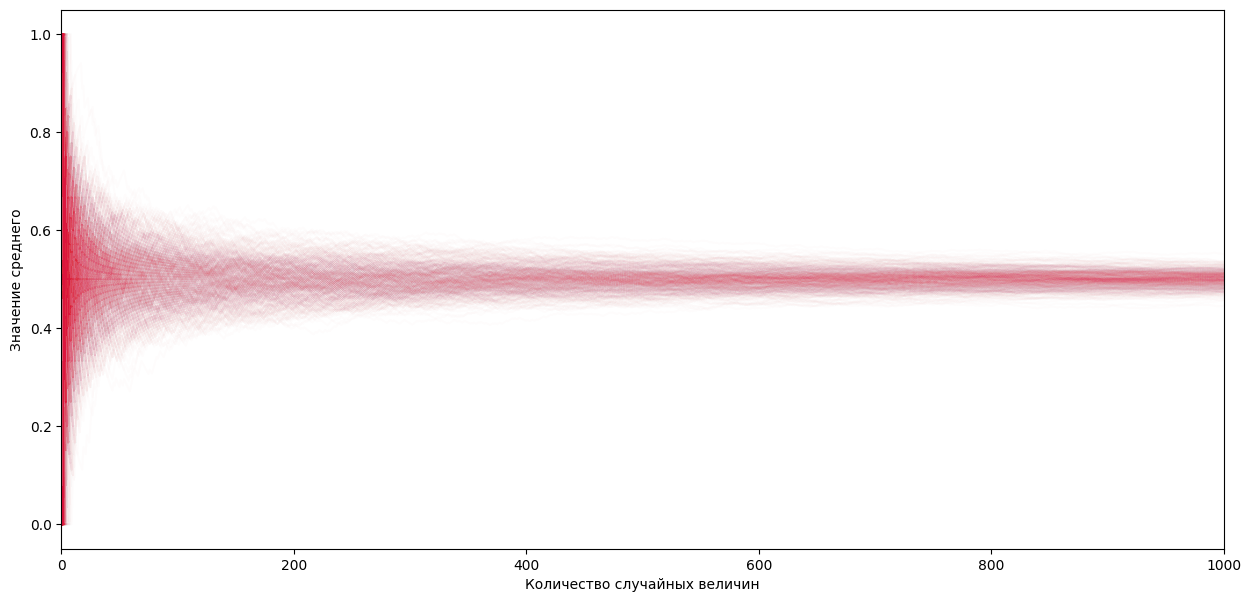

In [160]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** При достаточно большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.


Таким образом, в данном случае выборочное среднее &mdash; "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.


Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-либо смысле. О том, какие у оценок бывают "хорошие" свойства &mdash; на следующих занятиях!

## Задача 3
Проведите подобный эксперимент для ядерной оценки плотности.

Сгенерируйте 100 выборок по 1000 элементов из нормального распределения ($\mu$=0, $\sigma$=1).

In [161]:
size = 1000
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 1000)

Отрисуйте их ядерные оценки плотности на одном графике.  На этом же графике отрисуйте плотность искомого распределения

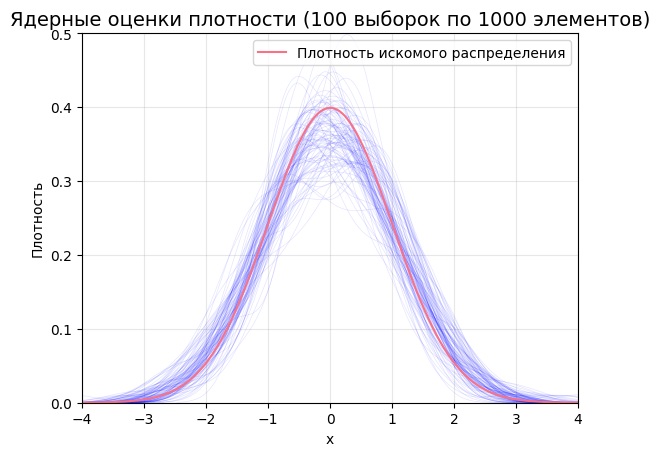

In [162]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-10, 10, 1000)
true_pdf = sps.norm.pdf(x)

for i in range(samples_count):
    sns.kdeplot(samples[i, :], alpha=0.1, color='blue', linewidth=0.5)

plt.plot(x, true_pdf, label='Плотность искомого распределения')

plt.title('Ядерные оценки плотности (100 выборок по 1000 элементов)', fontsize=14)
plt.xlabel('x')
plt.ylabel('Плотность')
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Увеличьте размер выборок до 1000 и повторите эксперимент.

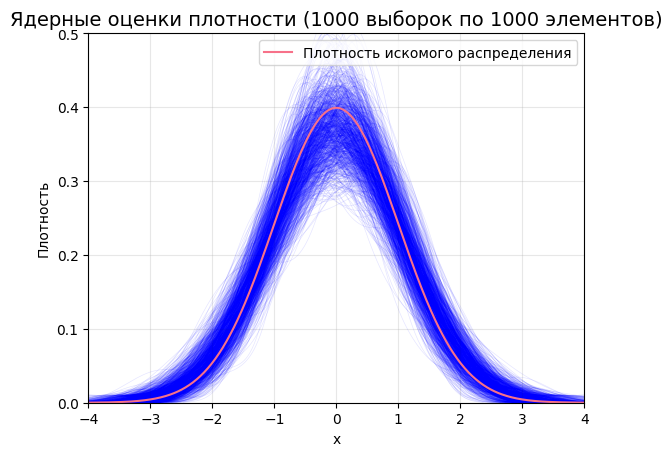

In [163]:
size = 1000
samples_count = 1000
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

x = np.linspace(-10, 10, 1000)
true_pdf = sps.norm.pdf(x)

for i in range(samples_count):
    sns.kdeplot(samples[i, :], alpha=0.1, color='blue', linewidth=0.5)

plt.plot(x, true_pdf, label='Плотность искомого распределения')

plt.title('Ядерные оценки плотности (1000 выборок по 1000 элементов)', fontsize=14)
plt.xlabel('x')
plt.ylabel('Плотность')
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

А теперь наоборот - поставьте размер выборки 100, а кол-во - 1000 и повторите эксперимент.

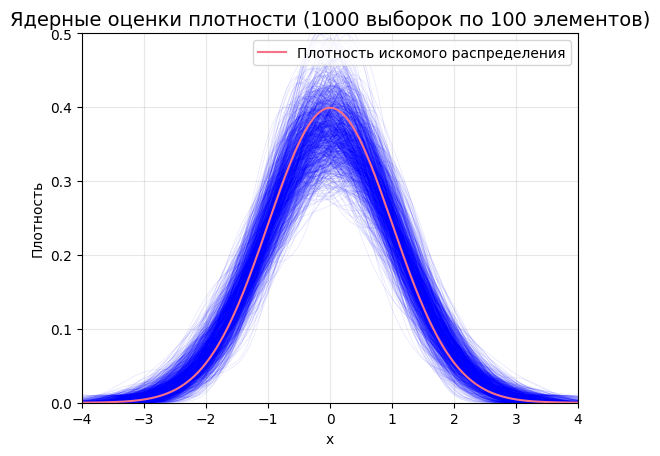

In [164]:
size = 100
samples_count = 1000
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

x = np.linspace(-10, 10, 1000)
true_pdf = sps.norm.pdf(x)

for i in range(samples_count):
    sns.kdeplot(samples[i, :], alpha=0.1, color='blue', linewidth=0.5)

plt.plot(x, true_pdf, label='Плотность искомого распределения')

plt.title('Ядерные оценки плотности (1000 выборок по 100 элементов)', fontsize=14)
plt.xlabel('x')
plt.ylabel('Плотность')
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()